In [21]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.stats import norm

In [10]:
# Analise do OSD 40 - Thermal Conditions
current_directory = os.getcwd()
relative_path = r'C:\Users\ferna\Documents\GitHub\anderworm\Project\datasets\temperature_osd40' 
folder_path = os.path.join(current_directory, relative_path)

data_frames = []

# Loop through all files in the folder
for filename in os.listdir(folder_path):
    # Check if the file has a .txt extension
    if filename.endswith('.txt'):
        # Create the absolute file path for each text file
        file_path = os.path.join(folder_path, filename)
        
        # Read the text file into a temporary DataFrame
        temp_df = pd.read_csv(file_path, delimiter='\t')  # Use the appropriate delimiter if needed
        temp_df['Sample_Name'] = filename
        # Append the temporary DataFrame to the list of DataFrames
        data_frames.append(temp_df)

# Concatenate all DataFrames into a single DataFrame
df_temperature = pd.concat(data_frames, ignore_index=True)
df_temperature.head()

,Reporter Identifier,VALUE,RAW,FLAGS,UNF_VALUE,Sample_Name
0,556,NaN,4.819,A,1.416,GSM360120_sample_table.txt
1,1475,NaN,"106,626",A,1.003,GSM360120_sample_table.txt
2,117,NaN,7.071,A,1.941,GSM360120_sample_table.txt
3,1414,NaN,4.999,A,1.130,GSM360120_sample_table.txt
4,1465,NaN,11.75,A,0.787,GSM360120_sample_table.txt


In [11]:
# Chunk para captura de temperatura
df_40_samples = pd.read_csv(r"C:\Users\ferna\Documents\GitHub\anderworm\Project\datasets\temperature_osd40\OSD-40-samples.csv")

df_40_assays = pd.read_csv(r"datasets\temperature_osd40\OSD-40-assays.csv")
df_40_assays.head()

,Sample Name,Extract Name,Material Type,Protocol REF,Labeled Extract Name,Label,Material Type.1,Protocol REF.1,Protocol REF.2,Hybridization Assay Name,Array Design REF,Protocol REF.3,Scan Name,Protocol REF.4,Derived Array Data File,Comment: Derived ArrayExpress FTP file
0,GSM360131 extract 1,GSM360131 extract 1,total_RNA,P-GSE14475-4,GSM360131 LE 1,Cy3,unknown,P-GSE14475-6,P-GSE14475-5,GSM360131,A-GEOD-7727,P-GSE14475-7,GSM360131,P-GSE14475-1,GSM360131_sample_table.txt,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...
1,GSM360123 extract 1,GSM360123 extract 1,total_RNA,P-GSE14475-4,GSM360123 LE 1,Cy3,unknown,P-GSE14475-6,P-GSE14475-5,GSM360123,A-GEOD-7727,P-GSE14475-7,GSM360123,P-GSE14475-1,GSM360123_sample_table.txt,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...
2,GSM360130 extract 1,GSM360130 extract 1,total_RNA,P-GSE14475-4,GSM360130 LE 1,Cy3,unknown,P-GSE14475-6,P-GSE14475-5,GSM360130,A-GEOD-7727,P-GSE14475-7,GSM360130,P-GSE14475-1,GSM360130_sample_table.txt,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...
3,GSM360120 extract 1,GSM360120 extract 1,total_RNA,P-GSE14475-4,GSM360120 LE 1,Cy3,unknown,P-GSE14475-6,P-GSE14475-5,GSM360120,A-GEOD-7727,P-GSE14475-7,GSM360120,P-GSE14475-1,GSM360120_sample_table.txt,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...
4,GSM360129 extract 1,GSM360129 extract 1,total_RNA,P-GSE14475-4,GSM360129 LE 1,Cy3,unknown,P-GSE14475-6,P-GSE14475-5,GSM360129,A-GEOD-7727,P-GSE14475-7,GSM360129,P-GSE14475-1,GSM360129_sample_table.txt,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...


In [12]:
# Perfoming merge with tables to extract temperature for each gene expression
df_40 = df_temperature.merge(df_40_assays, left_on= 'Sample_Name', right_on= 'Derived Array Data File',how = 'left')
df_40 = df_40.merge(df_40_samples, on= 'Sample Name', how = 'left')
df_40.head()

,Reporter Identifier,VALUE,RAW,FLAGS,UNF_VALUE,Sample_Name,Sample Name,Extract Name,Material Type,Protocol REF_x,...,Scan Name,Protocol REF.4,Derived Array Data File,Comment: Derived ArrayExpress FTP file,Source Name,Characteristics: organism,Comment: Sample_characteristics,Comment: Sample_source_name,Comment: Sample_description,Protocol REF_y
0,556,NaN,4.819,A,1.416,GSM360120_sample_table.txt,GSM360120 extract 1,GSM360120 extract 1,total_RNA,P-GSE14475-4,...,GSM360120,P-GSE14475-1,GSM360120_sample_table.txt,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,GSM360120 1,Caenorhabditis elegans,"Ceanorhabditis elegans, N2 wild type",10 degrees,"This study focused on temperature, profiling t...",NaN
1,1475,NaN,"106,626",A,1.003,GSM360120_sample_table.txt,GSM360120 extract 1,GSM360120 extract 1,total_RNA,P-GSE14475-4,...,GSM360120,P-GSE14475-1,GSM360120_sample_table.txt,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,GSM360120 1,Caenorhabditis elegans,"Ceanorhabditis elegans, N2 wild type",10 degrees,"This study focused on temperature, profiling t...",NaN
2,117,NaN,7.071,A,1.941,GSM360120_sample_table.txt,GSM360120 extract 1,GSM360120 extract 1,total_RNA,P-GSE14475-4,...,GSM360120,P-GSE14475-1,GSM360120_sample_table.txt,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,GSM360120 1,Caenorhabditis elegans,"Ceanorhabditis elegans, N2 wild type",10 degrees,"This study focused on temperature, profiling t...",NaN
3,1414,NaN,4.999,A,1.130,GSM360120_sample_table.txt,GSM360120 extract 1,GSM360120 extract 1,total_RNA,P-GSE14475-4,...,GSM360120,P-GSE14475-1,GSM360120_sample_table.txt,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,GSM360120 1,Caenorhabditis elegans,"Ceanorhabditis elegans, N2 wild type",10 degrees,"This study focused on temperature, profiling t...",NaN
4,1465,NaN,11.75,A,0.787,GSM360120_sample_table.txt,GSM360120 extract 1,GSM360120 extract 1,total_RNA,P-GSE14475-4,...,GSM360120,P-GSE14475-1,GSM360120_sample_table.txt,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,GSM360120 1,Caenorhabditis elegans,"Ceanorhabditis elegans, N2 wild type",10 degrees,"This study focused on temperature, profiling t...",NaN


In [27]:
df_40['Temperature C'] = df_40['Comment: Sample_source_name'].str.extract(r'(\d+)').astype(int)


In [29]:
df_40_normalized = df_40[['UNF_VALUE', 'Temperature C']]

In [30]:
for i in df_40.columns:
    print(i)

Reporter Identifier
VALUE
RAW
FLAGS
UNF_VALUE
Sample_Name
Sample Name
Extract Name
Material Type
Protocol REF_x
Labeled Extract Name
Label
Material Type.1
Protocol REF.1
Protocol REF.2
Hybridization Assay Name
Array Design REF
Protocol REF.3
Scan Name
Protocol REF.4
Derived Array Data File
Comment: Derived ArrayExpress FTP file
Source Name
Characteristics: organism
Comment: Sample_characteristics
Comment: Sample_source_name
Comment: Sample_description
Protocol REF_y
Temperature C


In [31]:
df_40_normalized10 = df_40_normalized[df_40_normalized['Temperature C']==10]
df_40_normalized15 = df_40_normalized[df_40_normalized['Temperature C']==15]
df_40_normalized20 = df_40_normalized[df_40_normalized['Temperature C']==20]
df_40_normalized25 = df_40_normalized[df_40_normalized['Temperature C']==25]

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))  # Optional: Adjust the figure size
plt.boxplot(df_40_normalized10['UNF_VALUE'], vert=False)  # 'vert=False' for horizontal boxplot
plt.xlabel('UNF_VALUE')
plt.title('Boxplot of Value by Category')
plt.show()

Text(0, 0.5, 'Probability Density')

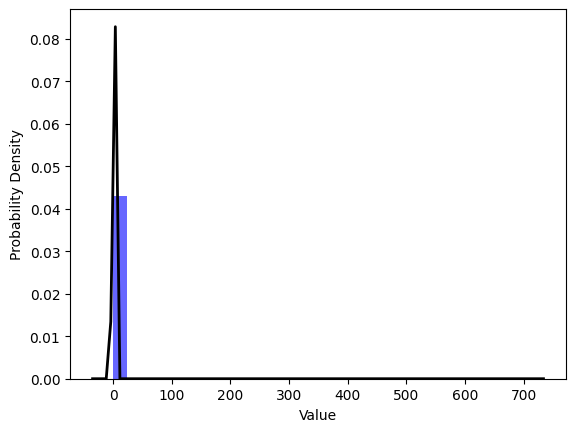

In [24]:
# Create a sample DataFrame (replace this with your actual data)

# Plot the histogram of your data
plt.hist(df_40_normalized10['UNF_VALUE'], bins=30, density=True, alpha=0.6, color='b')

# Fit a normal distribution to the data
mu, std = norm.fit(df_40_normalized10['UNF_VALUE'])

# Plot the PDF (Probability Density Function) of the fitted normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

# Add labels and a title
plt.xlabel('Value')
plt.ylabel('Probability Density')


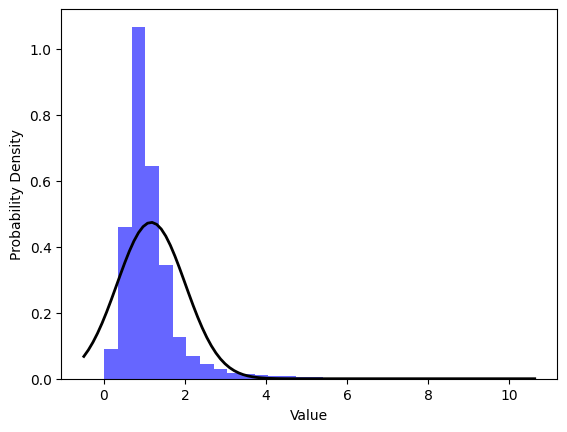

In [32]:
# Calculate the mean and standard deviation
mu, std = norm.fit(df_40_normalized10['UNF_VALUE'])

# Define a threshold for filtering unnormalized values (e.g., within 3 standard deviations)
threshold = 3 * std

# Filter out values that are not within the threshold
filtered_df = df_40_normalized10[(df_40_normalized10['UNF_VALUE'] >= mu - threshold) & (df_40_normalized10['UNF_VALUE'] <= mu + threshold)]

# Plot the histogram of the filtered data
plt.hist(filtered_df['UNF_VALUE'], bins=30, density=True, alpha=0.6, color='b')

# Fit a normal distribution to the filtered data
mu, std = norm.fit(filtered_df['UNF_VALUE'])

# Plot the PDF (Probability Density Function) of the fitted normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

# Add labels and a title
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.show()

Text(0, 0.5, 'Probability Density')

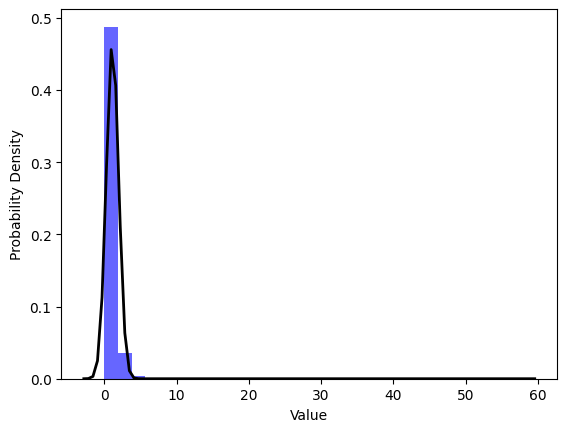

In [36]:
# Create a sample DataFrame (replace this with your actual data)

# Plot the histogram of your data
plt.hist(df_40_normalized15['UNF_VALUE'], bins=30, density=True, alpha=0.6, color='b')

# Fit a normal distribution to the data
mu, std = norm.fit(df_40_normalized15['UNF_VALUE'])

# Plot the PDF (Probability Density Function) of the fitted normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

# Add labels and a title
plt.xlabel('Value')
plt.ylabel('Probability Density')

Text(0, 0.5, 'Probability Density')

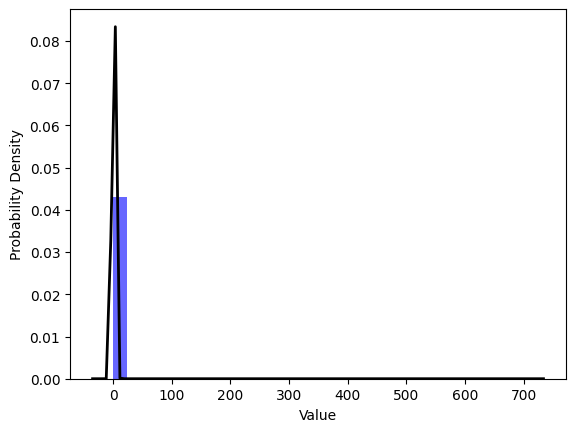

In [37]:
# Create a sample DataFrame (replace this with your actual data)

# Plot the histogram of your data
plt.hist(df_40_normalized20['UNF_VALUE'], bins=30, density=True, alpha=0.6, color='b')

# Fit a normal distribution to the data
mu, std = norm.fit(df_40_normalized20['UNF_VALUE'])

# Plot the PDF (Probability Density Function) of the fitted normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

# Add labels and a title
plt.xlabel('Value')
plt.ylabel('Probability Density')

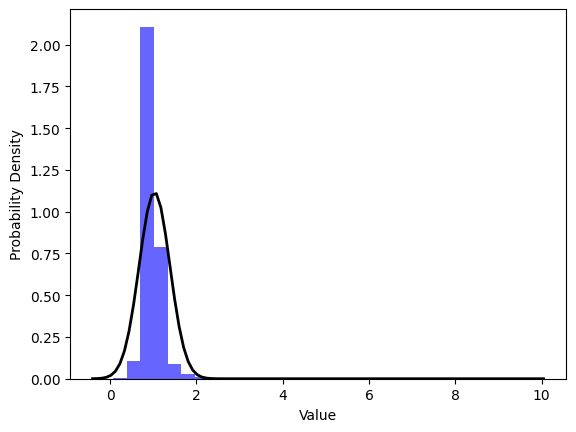

In [33]:
# Calculate the mean and standard deviation
mu, std = norm.fit(df_40_normalized20['UNF_VALUE'])

# Define a threshold for filtering unnormalized values (e.g., within 3 standard deviations)
threshold = 3 * std

# Filter out values that are not within the threshold
filtered_df = df_40_normalized20[(df_40_normalized20['UNF_VALUE'] >= mu - threshold) & (df_40_normalized20['UNF_VALUE'] <= mu + threshold)]

# Plot the histogram of the filtered data
plt.hist(filtered_df['UNF_VALUE'], bins=30, density=True, alpha=0.6, color='b')

# Fit a normal distribution to the filtered data
mu, std = norm.fit(filtered_df['UNF_VALUE'])

# Plot the PDF (Probability Density Function) of the fitted normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

# Add labels and a title
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.show()